In [177]:
my_list = [4,2,6,5,1,3,10,7,9,8]

In [158]:
def bubble_sort(my_list):
    for i in range(len(my_list) - 1, 0 ,-1):
        for j in range(i):
            if my_list[j] > my_list[j+1]:
                temp = my_list[j]
                my_list[j] = my_list[j+1]
                my_list[j+1] = temp
                yield my_list
    # return my_list

In [159]:
bubble_sorted_list = bubble_sort(my_list)

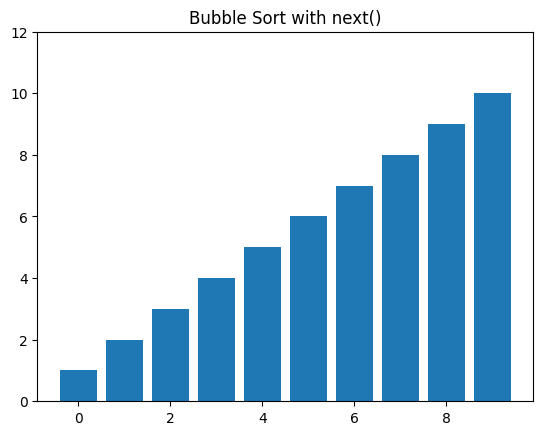

In [160]:

# A wrapper around next(gen)
def get_next_frame(a_list):
    try:
        return next(a_list)
    except StopIteration:
        return None  # signals end of animation

fig, ax = plt.subplots()
bars = ax.bar(range(len(my_list)), my_list)
ax.set_ylim(0, max(my_list) * 1.2)
ax.set_title("Bubble Sort with next()")

def update(_):
    frame = get_next_frame(bubble_sorted_list)
    if frame is None:
        ani.event_source.stop()  # stop animation when generator ends
        return bars
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    return bars

# FuncAnimation just keeps calling update,
# we don't give it all frames ahead of time
ani = animation.FuncAnimation(
    fig,
    update,
    interval=300,
    blit=False,
    repeat=False,
    save_count=15
)

HTML(ani.to_jshtml())

In [227]:
my_list = [4,2,6,5,1,3,10,7,9,8]

In [228]:
def selection_sort(my_list):
    for i in range(len(my_list)-1):
        min_index = i
        for j in range(i+1, len(my_list)):
            if my_list[j] < my_list[min_index]:
                min_index = j
        if i != min_index:
            temp = my_list[i]
            my_list[i] = my_list[min_index]
            my_list[min_index] = temp
        yield my_list



In [229]:
selection_sorted_list = selection_sort(my_list)

C:\Users\Sanya Nanda\AppData\Local\Temp\ipykernel_32276\1434228854.py:30: UserWarning: You passed in an explicit save_count=17 which is being ignored in favor of frames=17.
  ani = animation.FuncAnimation(


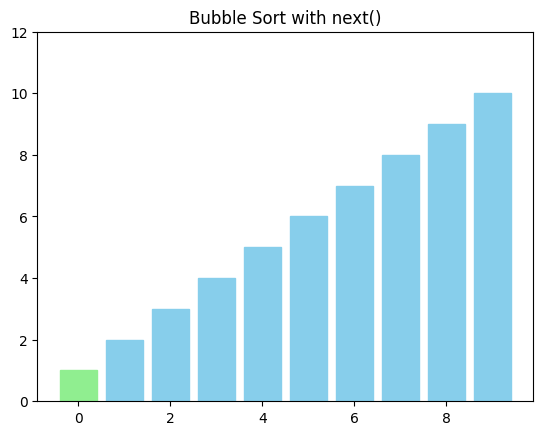

In [230]:

# A wrapper around next(gen)
def get_next_frame(a_list):
    try:
        return next(a_list)
    except StopIteration:
        return None  # signals end of animation

fig, ax = plt.subplots()
bars = ax.bar(range(len(my_list)), my_list)
ax.set_ylim(0, max(my_list) * 1.2)
ax.set_title("Bubble Sort with next()")

def update(frame_idx):
    frame = get_next_frame(selection_sorted_list)
    for rect in bars:
        rect.set_color("skyblue")
    for i in range(min(frame_idx + 1, len(bars))):
        bars[i].set_color("lightgreen")
    if frame is None:
        ani.event_source.stop()  # stop animation when generator ends
        return bars
    
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    return bars


# FuncAnimation just keeps calling update,
# we don't give it all frames ahead of time
ani = animation.FuncAnimation(
    fig,
    update,
    frames=17,
    interval=300,
    blit=False,
    repeat=False,
    save_count=17
)

HTML(ani.to_jshtml())

In [241]:
my_list = [4,2,6,5,1,3,10,7,9,8]

In [242]:
def insertion_sort(my_list):
    for i in range(1, len(my_list)):
        temp = my_list[i]
        j = i-1
        while temp < my_list[j] and j > -1:
            my_list[j+1] = my_list[j] 
            my_list[j] = temp
            j -= 1
            yield my_list



In [243]:
insertion_sorted_list = insertion_sort(my_list)

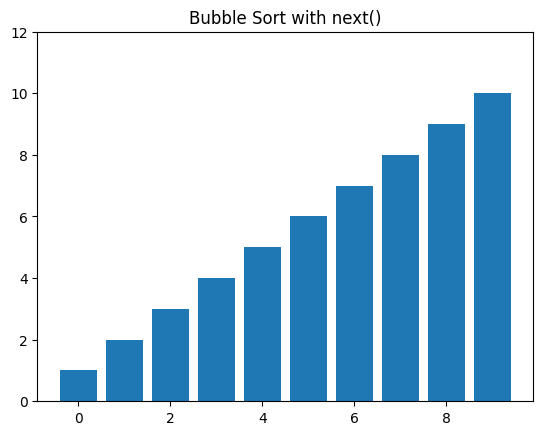

In [244]:

# A wrapper around next(gen)
def get_next_frame(a_list):
    try:
        return next(a_list)
    except StopIteration:
        return None  # signals end of animation

fig, ax = plt.subplots()
bars = ax.bar(range(len(my_list)), my_list)
ax.set_ylim(0, max(my_list) * 1.2)
ax.set_title("Bubble Sort with next()")

def update(_):
    frame = get_next_frame(insertion_sorted_list)
    if frame is None:
        ani.event_source.stop()  # stop animation when generator ends
        return bars
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    return bars

# FuncAnimation just keeps calling update,
# we don't give it all frames ahead of time
ani = animation.FuncAnimation(
    fig,
    update,
    interval=300,
    blit=False,
    repeat=False,
    save_count=20
)

HTML(ani.to_jshtml())

In [245]:
my_list = [4,2,6,5,1,3,10,7,9,8]

In [251]:
def merge(l1, l2):
    combined = []
    i,j = 0,0
    while i < len(l1) and j < len(l2):
        if l1[i] < l2[j]:
            combined.append(l1[i])
            i += 1
        else:
            combined.append(l2[j])
            j += 1
    if i < len(l1):
        combined.extend(l1[i:])
    if j < len(l2):
        combined.extend(l2[j:])
    return combined


def merge_sort(my_list):
    if len(my_list)==1: # base case
        return my_list
    mid_idx = int(len(my_list)/2)
    left,right = merge_sort(my_list[:mid_idx]), merge_sort(my_list[mid_idx:]) # make the problem smaller recursively
    return merge(left,right) 

In [252]:
merge_sorted_list = merge_sort(my_list)

In [253]:
merge_sorted_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [260]:
my_list = [4,2,6,5,1,3,10,7,9,8]

In [264]:
def swap(my_list, index1, index2):
    temp = my_list[index1]
    my_list[index1] = my_list[index2]
    my_list[index2] = temp


def pivot(my_list, pivot_index, end_index):
    swap_index = pivot_index
    for i in range(pivot_index+1, end_index+1):
        if my_list[i] < my_list[pivot_index]:
            swap_index += 1
            swap(my_list, swap_index, i)
    swap(my_list, pivot_index, swap_index)
    return swap_index
    
    
def quick_sort_helper(my_list, left, right):
    if left<right: # base case
        pivot_index = pivot(my_list,left,right)
        quick_sort_helper(my_list, left, pivot_index-1) # make it smaller recursively
        quick_sort_helper(my_list, pivot_index+1, right)
    return my_list
    

def quick_sort(my_list):
    return quick_sort_helper(my_list, 0, len(my_list)-1)

In [265]:
quick_sorted_list = quick_sort(my_list)


In [266]:
print(quick_sorted_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
